# **Binary Classification with make_moons Dataset**

This project focuses on binary classification using the `make_moons` dataset from scikit-learn. The make_moons function generates a synthetic dataset consisting of two interleaving half circles, making it a suitable dataset for binary classification tasks.

The goal of this project is to build a machine learning model that can accurately classify data points as belonging to one of the two classes based on their coordinates.

In [ ]:
import tensorflow as tf

## Load the data

In [ ]:
# load the data
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.03, random_state=42)
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [ ]:
# check the data and labels shapes
X.shape, y.shape

((1000, 2), (1000,))

## Visualize the data

Text(0.5, 1.0, 'Moons dataset')

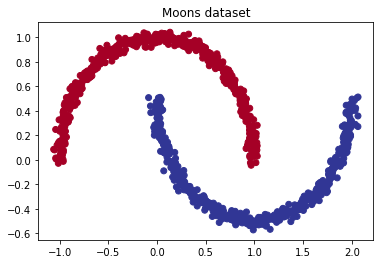

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Moons dataset")

In [ ]:
# visualize the data with dataframe
import pandas as pd
pd.DataFrame(X, y, columns=["X1","X2"])


,X1,X2
1,-0.009332,0.390981
1,0.954574,-0.473756
1,0.918526,-0.425196
1,0.412768,-0.376385
0,-0.845320,0.528799
...,...,...
0,0.793018,0.591402
0,-0.138777,0.968000
1,1.653915,-0.291798
0,-0.934102,0.353582


## Preprocess the data = **normalize** the data

In [ ]:
# check the min, max values of the data
X.max(), X.min()

(2.0646373678153123, -1.061750818658048)

In [ ]:
# normalize the data
X_norm = X/X.max()

In [ ]:
X_norm.max(), X_norm.min()

(1.0, -0.5142553531236023)

In [ ]:
# visualize the data with dataframe
import pandas as pd
pd.DataFrame(X_norm, y, columns=["X1","X2"])Ķļ

,X1,X2
1,-0.004520,0.189370
1,0.462345,-0.229462
1,0.444885,-0.205942
1,0.199923,-0.182301
0,-0.409428,0.256122
...,...,...
0,0.384096,0.286444
0,-0.067216,0.468847
1,0.801068,-0.141331
0,-0.452429,0.171256


In [ ]:
# split the data into train and test sets
X_train = X_norm[:800]
y_train = y[:800]

X_test = X_norm[800:]
y_test = y[800:]

## Build a model

In [ ]:
# set a random seed
tf.random.set_seed(42)

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(6, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(6, activation="relu", name="hidden_layer_3"),
    tf.keras.layers.Dense(6, activation="relu", name="hidden_layer_4"),
    tf.keras.layers.Dense(6, activation="relu", name="hidden_layer_5"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer"),
], name="Binary_Classification_Model")

In [ ]:
# create callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

In [ ]:
# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [ ]:
# fit the model
history = model.fit(X_train, y_train, verbose=0, epochs=40, validation_data=(X_test, y_test), callbacks=[lr_scheduler] )

In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 3.0047e-05 - accuracy: 1.0000


[3.004747850354761e-05, 1.0]

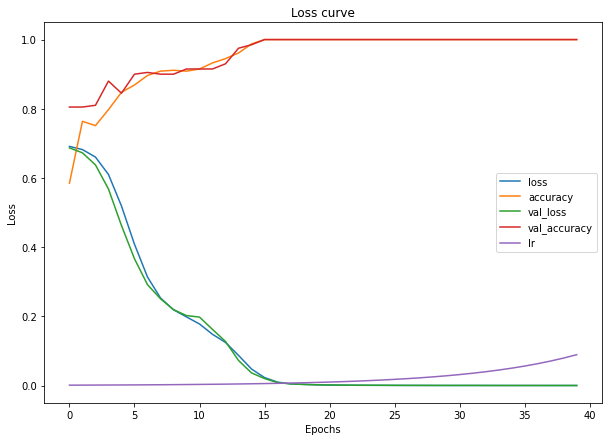

In [ ]:
# plot the loss curve
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("/content/drive/MyDrive/TensorFlow_course/saved_models/Binary_classification_model/Loss_curve")

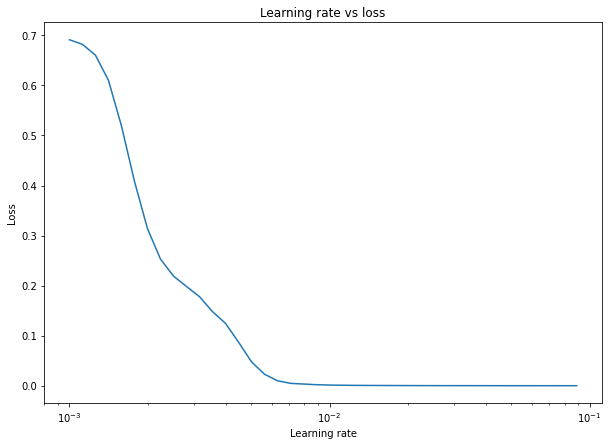

In [ ]:
# plot the learning rate against loss
plt.figure(figsize=(10,7))
plt.semilogx(history.history["lr"], history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")
plt.savefig("/content/drive/MyDrive/TensorFlow_course/saved_models/Binary_classification_model/Learning_rate_vs_loss")

In [ ]:
# plot the decision boundary
import numpy as np

def plot_decision_boundary(model, X, y):

  """First, we need to define a grid of points across the feature space.
  To do this, we can find the minimum and maximum values for each feature
  and expand the grid to ensure the whole feature space is covered.
  We will use a resolution of 0.1 """

  x_min, x_max = X[:,0].min(), X[:,0].max()+0.1
  y_min, y_max = X[:,1].min(), X[:,1].max()+0.1

  # turn this into a grid and create all of the lines and rows of the grid
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min, y_max,100))

  # make predictions
  #y_pred = model.predict(X) --> shape error!

  """change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array"""
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)

  # check for multiclass classification
  if len(y_pred[0])>1:
    print("Multiclass-classification")
    y_pred=np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("Binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary

  """Next, we need to plot the grid of values as a contour plot.
  The contourf() function takes separate grids for each axis"""

  # plot the decision-surface with a two-color colormap
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Binary classification
313/313 [==============================] - 0s 1ms/step
Binary classification


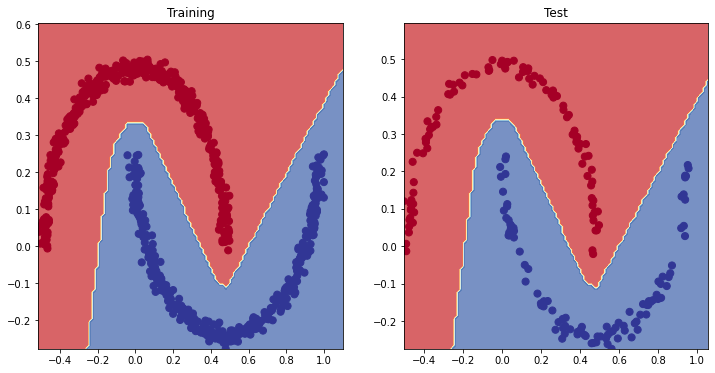

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test, y_test)
plt.savefig("/content/drive/MyDrive/TensorFlow_course/saved_models/Binary_classification_model/Training_vs_Test_decision_boundary.png")

## Summarize the model

In [ ]:
# summarize the model
model.summary()

Model: "Binary_Classification_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 6)                 18        
                                                                 
 hidden_layer_2 (Dense)      (None, 6)                 42        
                                                                 
 hidden_layer_3 (Dense)      (None, 6)                 42        
                                                                 
 hidden_layer_4 (Dense)      (None, 6)                 42        
                                                                 
 hidden_layer_5 (Dense)      (None, 6)                 42        
                                                                 
 output_layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193

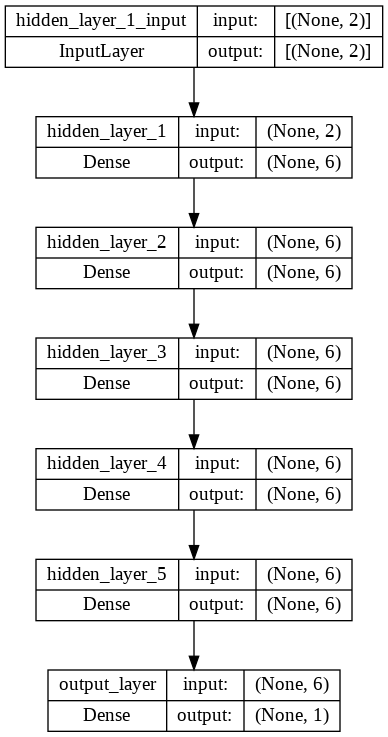

In [ ]:
# visualize the model
tf.keras.utils.plot_model(model, show_shapes=True)

## Save the model

In [ ]:
model.save("Binary_Classification_Model.h5")